In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly
import pandas as pd

In [2]:
## Recebendo e tratando os dados

data_confirmed = pd.read_csv("JHDATA/time_series_covid19_confirmed_global.csv")
data_death = pd.read_csv("JHDATA/time_series_covid19_deaths_global.csv")
data_death.drop(['Province/State','Lat', 'Long'], axis = 1, inplace = True)
data_confirmed.drop(['Province/State','Lat', 'Long'], axis = 1, inplace = True)

In [3]:
## Retornando os dados importantes acerca de um país
## Tipo de retorno: Duas tuplas sendo a primeiro acerca de Casos confirmados e a segunda acerca de Mortes
## (Datas, Dias corridos, Valores, Derivada no ponto)
def data_getter(country = 'Brazil'):
    dfd = (data_death.loc[data_death['Country/Region'] == country])
    dfc = data_confirmed.loc[data_confirmed['Country/Region'] == country]
    dfd = dfd.loc[:, (dfd != 0).any(axis=0)].iloc[:, 1:]
    dfc = dfc.loc[:, (dfc != 0).any(axis=0)].iloc[:, 1:]
    
    dfc_date = list(dfc.columns)
    dfc_days = np.arange(1,len(dfc_date) + 1)
    dfc_value = dfc.values[0]

    dfd_date = list(dfc.columns)
    dfd_days = np.arange(1,len(dfd_date) + 1)
    dfd_value = dfc.values[0]
    
    dfc_deriv = np.gradient(dfc_value)
    dfd_deriv = np.gradient(dfd_value)
    return (dfc_date, dfc_days, dfc_value, dfc_deriv),(dfd_date, dfd_days, dfd_value, dfd_deriv)

In [4]:
## Plota o gráfico de dados
## X: Eixo X
## Y: Lista com os dados a serem plotados, estes dados compartilham um único eixo X
## Labels: Lista com as legendas
## n: Quantidade máxima de dias a serem plotados, para efeito de comparação com países que não estão no mesmo momento
def plotter(title = 'Brasil', x = [], y = [], labels = [], n = 0):
    fig = plt.figure(figsize = (20,10))
    for i in range(0,len(y)):
        if n != 0:
            plt.plot(x[:n], y[i][:n], label = labels[i][:n])
        else:
            plt.plot(x, y[i], label = labels[i])
    plt.title(title)
    plt.legend()
    plt.grid(alpha = .5)

In [5]:
dfc_br, dfd_br = data_getter('Brazil')
dfc_it, dfd_it = data_getter('Italy')
dfc_es, dfd_es = data_getter('Spain')
dfc_us, dfd_es = data_getter('US')

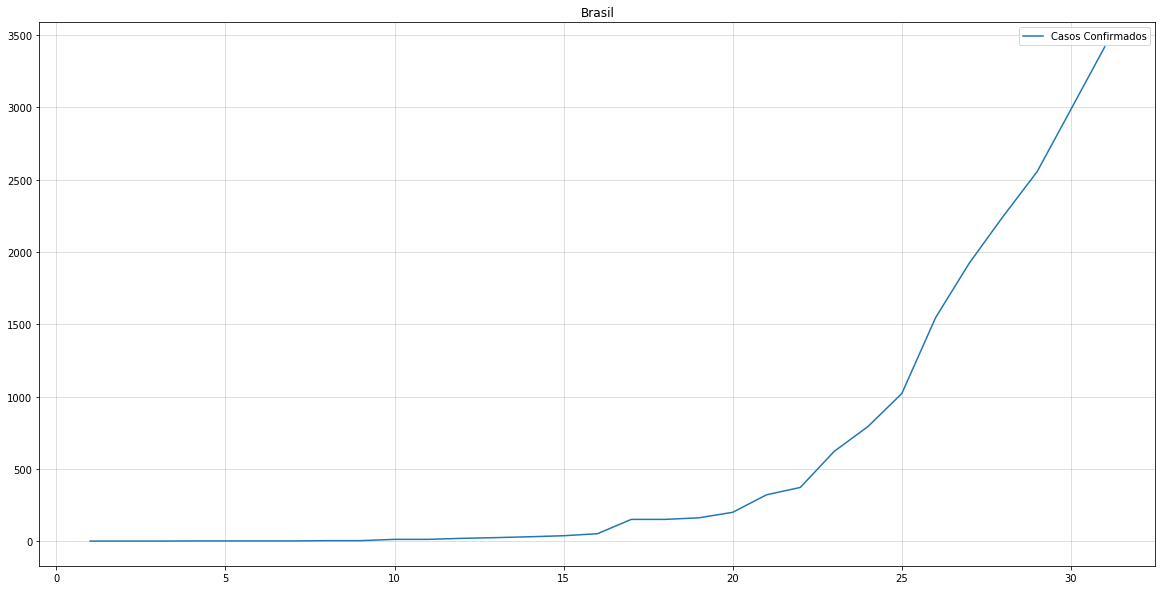

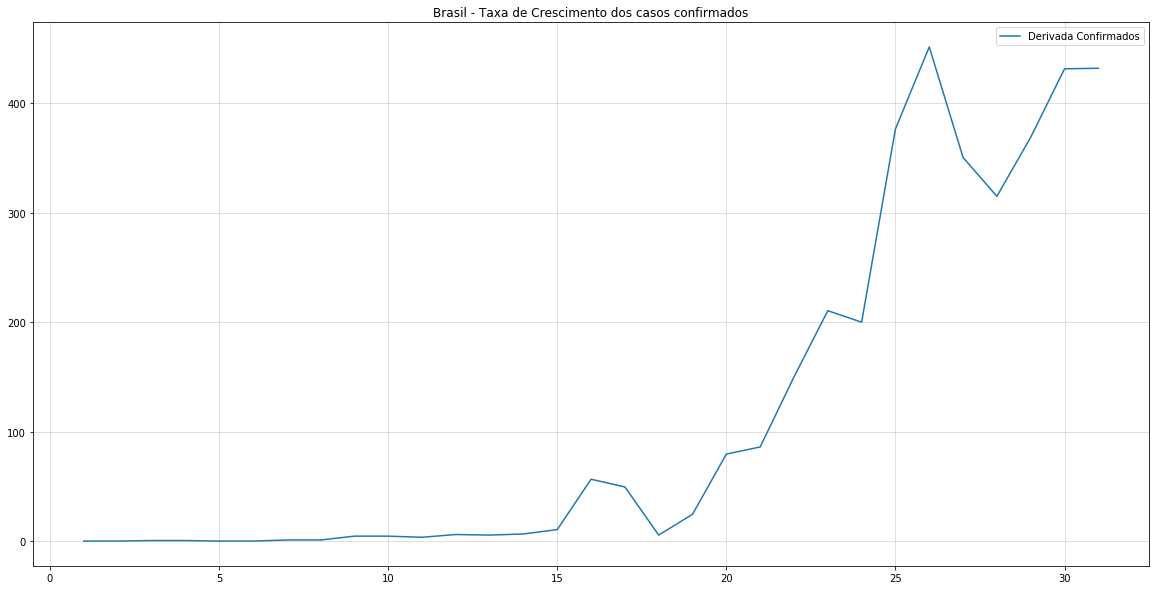

In [6]:
plotter('Brasil', dfc_br[1], [dfc_br[2]], ['Casos Confirmados'])
plotter('Brasil - Taxa de Crescimento dos casos confirmados', dfc_br[1], [dfc_br[3]], ['Derivada Confirmados'])

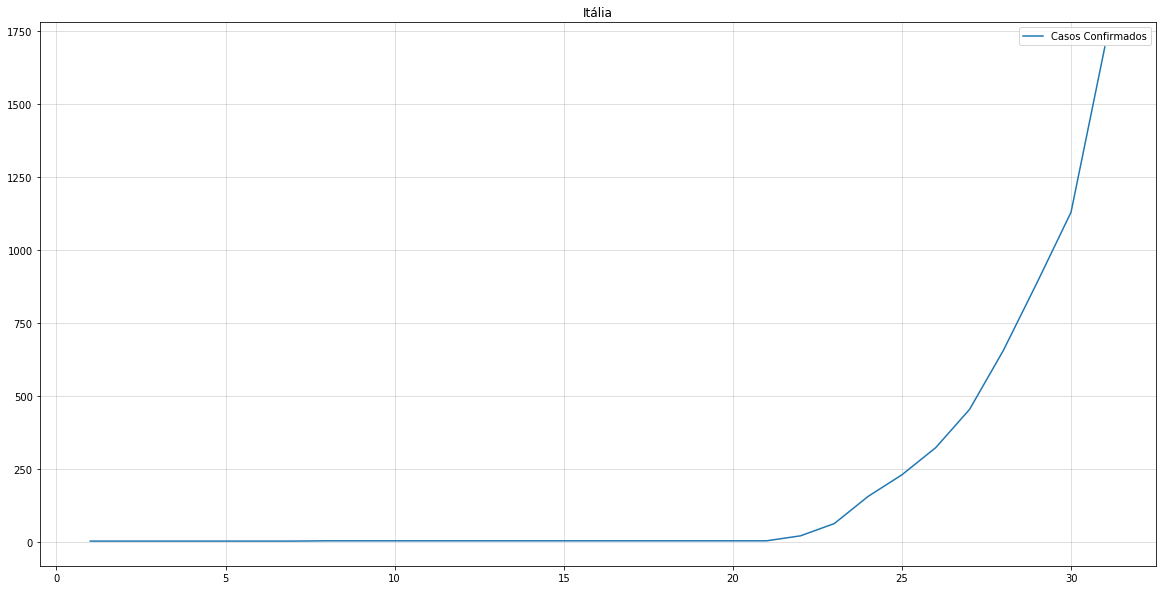

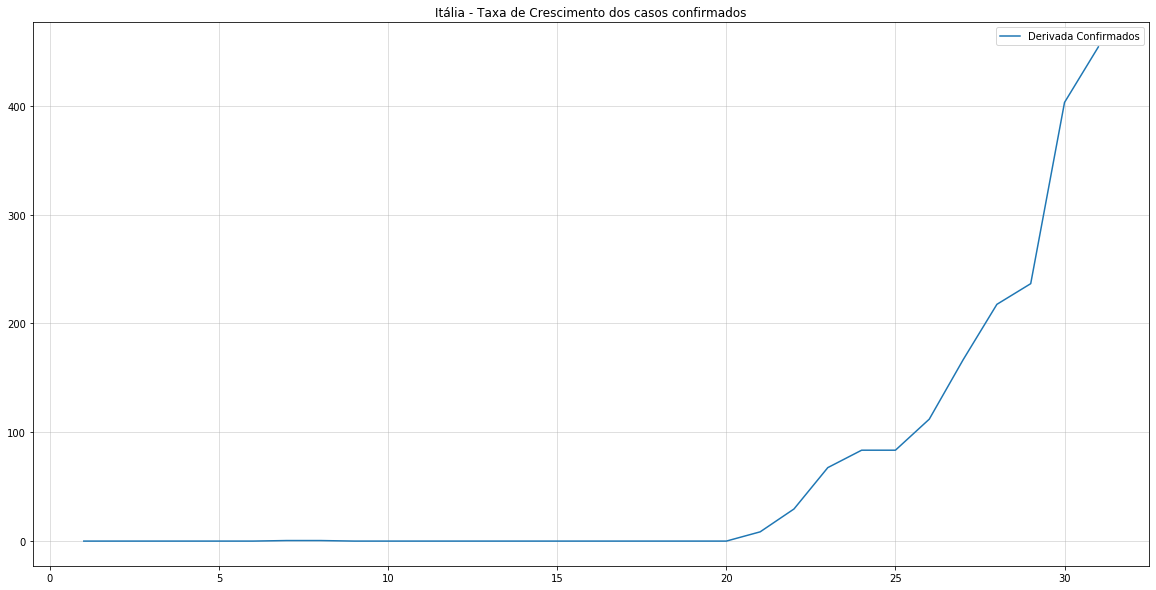

In [7]:
plotter('Itália', dfc_it[1], [dfc_it[2]], ['Casos Confirmados'], n = 31)
plotter('Itália - Taxa de Crescimento dos casos confirmados', dfc_it[1], [dfc_it[3]], ['Derivada Confirmados'], n = 31)

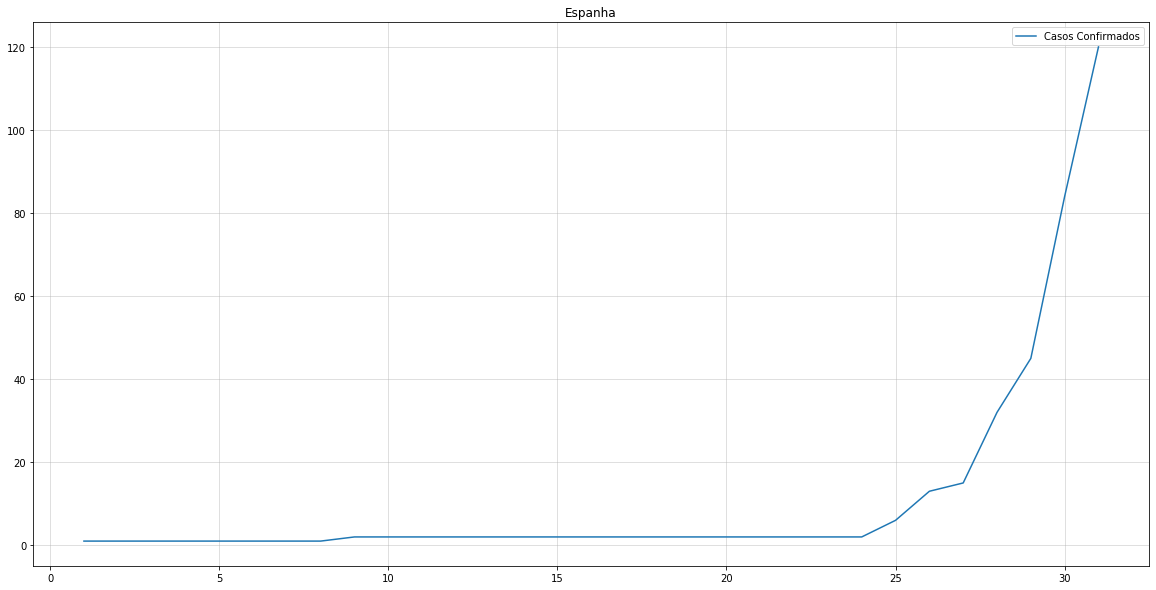

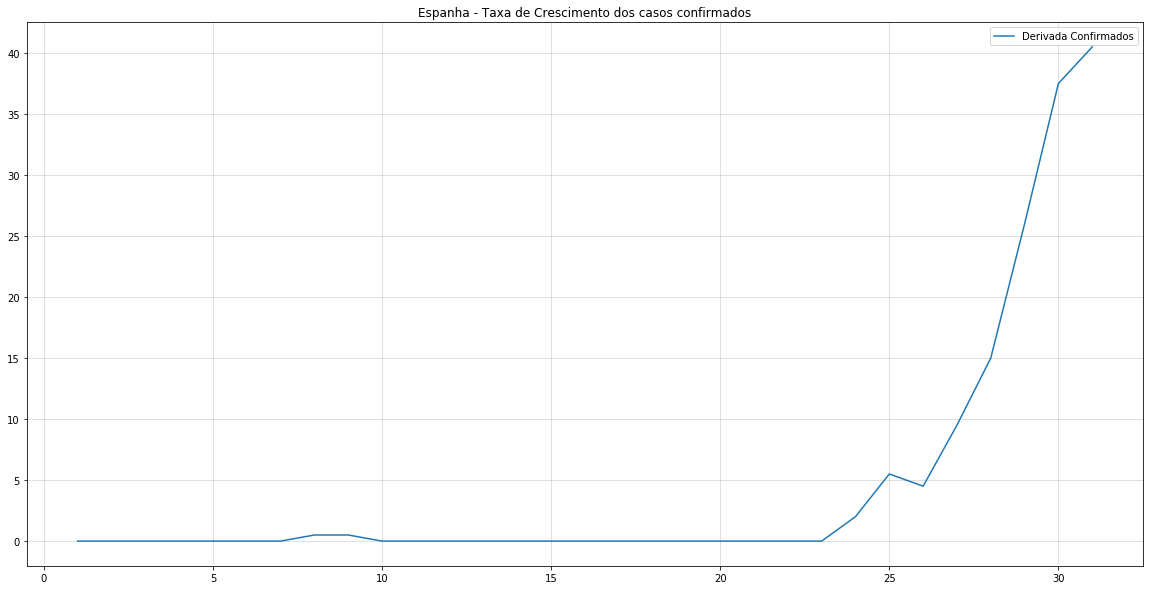

In [8]:
plotter('Espanha', dfc_es[1], [dfc_es[2]], ['Casos Confirmados'], n = 31)
plotter('Espanha - Taxa de Crescimento dos casos confirmados', dfc_es[1], [dfc_es[3]], ['Derivada Confirmados'], n = 31)

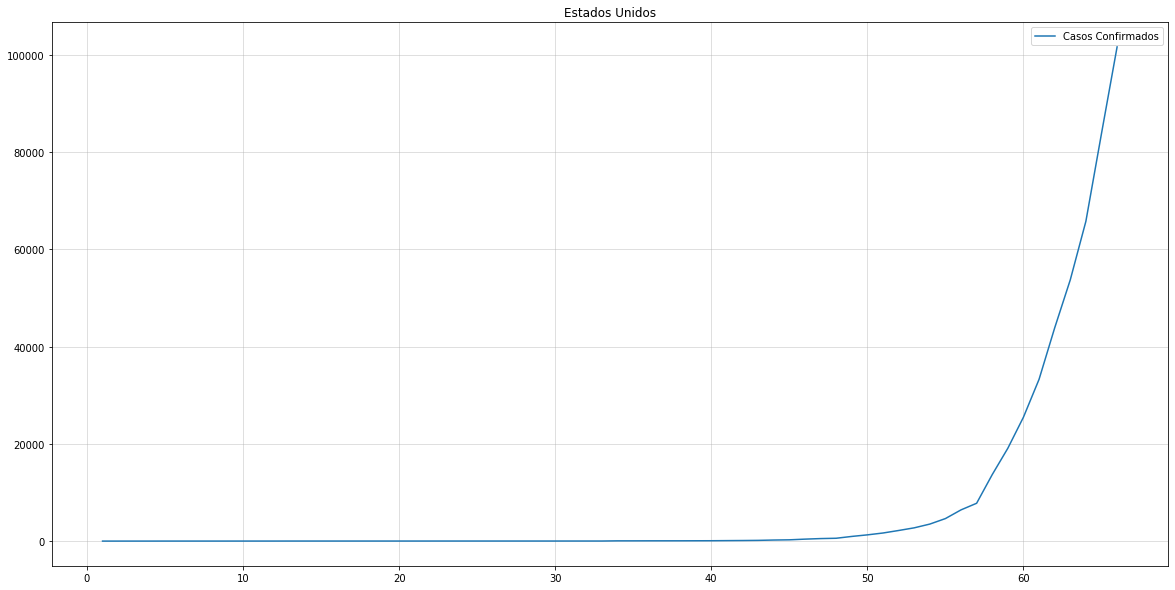

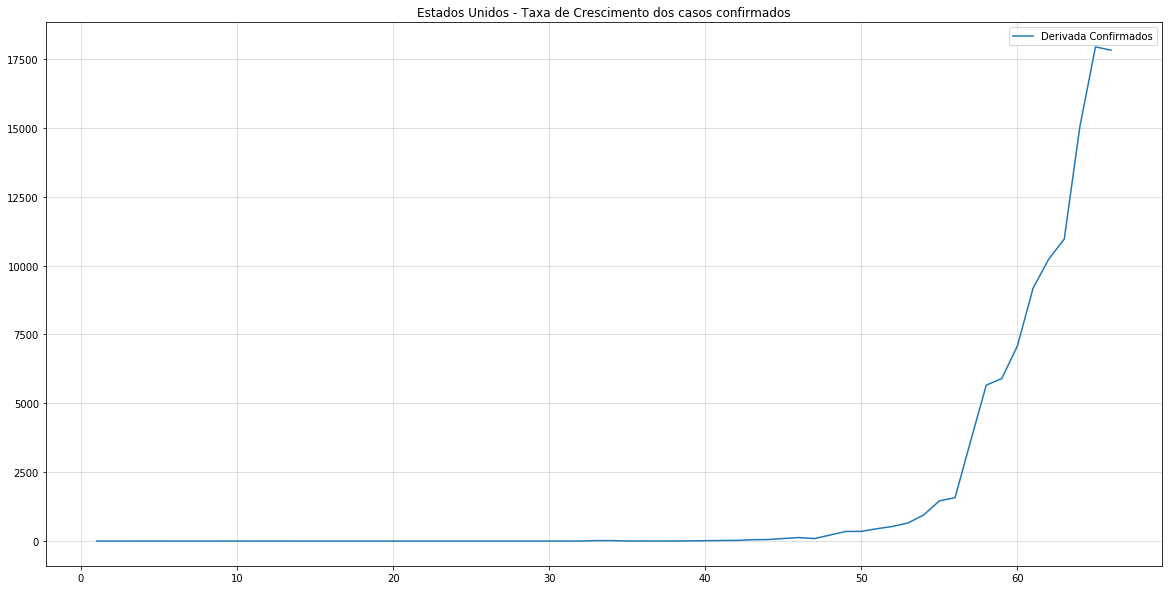

In [9]:
plotter('Estados Unidos', dfc_us[1], [dfc_us[2]], ['Casos Confirmados'])
plotter('Estados Unidos - Taxa de Crescimento dos casos confirmados', dfc_us[1], [dfc_us[3]], ['Derivada Confirmados'])